In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [13]:
data = pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [14]:
data.shape

(5000, 7)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
data.drop('Address', axis = 1 , inplace=True )

In [25]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [26]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<AxesSubplot:>

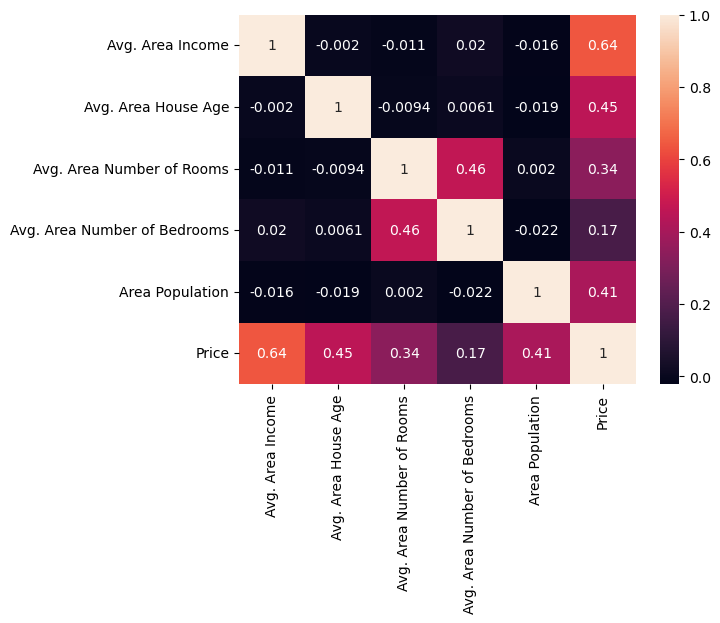

In [27]:
sns.heatmap(data.corr(),annot=True)

In [37]:
x= data[['Avg. Area Income', 'Avg. Area House Age' , 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 
         'Area Population']]
Y= data['Price']

In [38]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X=sc.fit_transform(x)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=101)
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [40]:
s1=model.score(x_train , y_train)
s2=model.score(x_test,y_test)
print("Training performance : ",s1)
print("Training performance : ",s2)

Training performance :  0.9171466248766579
Training performance :  0.9211719165402021


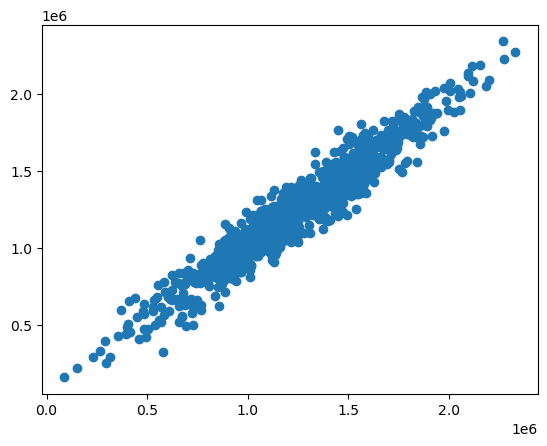

In [41]:
p=model.predict(x_test)
plt.scatter(y_test,p)

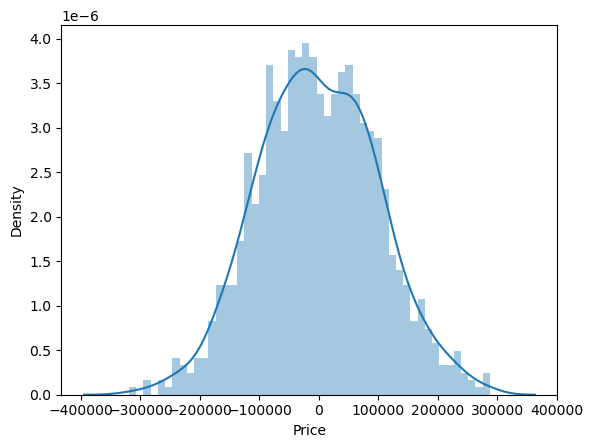

In [42]:
sns.distplot((y_test-p),bins=50);

In [43]:
res=pd.DataFrame({'ActualPrice':y_test,'predictedPrice':p})
print(res.head())

       ActualPrice  predictedPrice
1718  1.251689e+06    1.257920e+06
2511  8.730483e+05    8.221124e+05
345   1.696978e+06    1.740669e+06
2521  1.063964e+06    9.724521e+05
54    9.487883e+05    9.934223e+05


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(y_test,p)
mae= mean_absolute_error(y_test,p)

print("mean Squared Error :",mse)
print("mean Absolute Error :",mae)

mean Squared Error : 10100187858.867588
mean Absolute Error : 81305.23300086224


In [ ]:
i=float(input("Enter Average Area Income: "))
a=float(input("Enter Average House Age: "))
r=float(input("Enter number of rooms: "))
br=float(input("Enter number of bedrooms: "))
p=float(input("Enter Average Area of population: "))
print ("The predicted House price is:",round(float(model.predict([[i,a,r,br,p]])[0]),2))

Enter Average Area Income: 30000
Enter Average House Age: 400
Enter number of rooms: 6
Enter number of bedrooms: 5
